In [3]:
# prompt: /content/drive/MyDrive/question4-stock-data (1).csv   create data frame using csv

import pandas as pd

# Load the dataframe
df = pd.read_csv('/question4-stock-data (1).csv')

# Print some info
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11291 non-null  int64  
 1   Date        11181 non-null  object 
 2   Adj Close   11198 non-null  float64
 3   Close       11174 non-null  float64
 4   High        11196 non-null  float64
 5   Low         11164 non-null  float64
 6   Open        11188 non-null  float64
 7   Volume      11146 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 705.8+ KB


Dataset shape: (11291, 8)
Date range: 0 to 11290
Missing values per column:
Unnamed: 0      0
Date          110
Adj Close      93
Close         117
High           95
Low           127
Open          103
Volume        145
dtype: int64
         Unnamed: 0     Adj Close         Close          High           Low  \
count  11291.000000  11198.000000  11174.000000  11196.000000  11164.000000   
mean    5645.000000     63.609130     72.026945     72.503100     71.665079   
std     3259.575279     52.266247     51.259828     51.550735     51.011632   
min        0.000000      2.259452      3.237711      3.237711      3.237711   
25%     2822.500000     19.224636     27.500000     27.789255     27.536156   
50%     5645.000000     50.608900     66.035000     66.724998     65.418751   
75%     8467.500000    104.723621    114.297503    114.892500    113.639999   
max    11290.000000    254.770004    254.770004    255.229996    253.589996   

               Open        Volume  
count  11188.000000

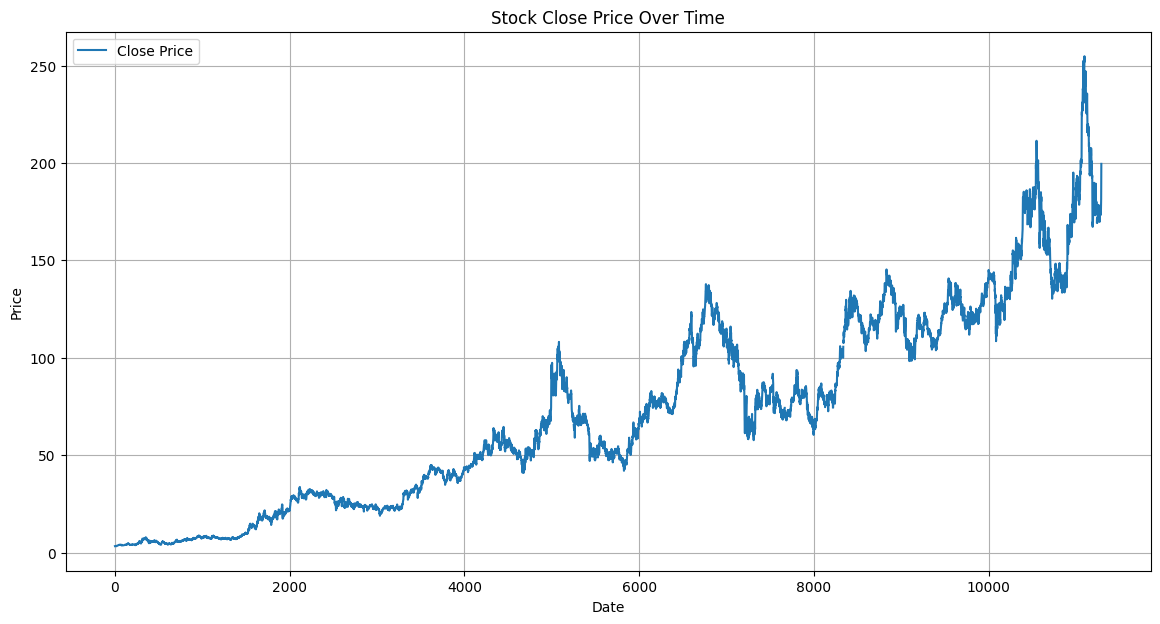

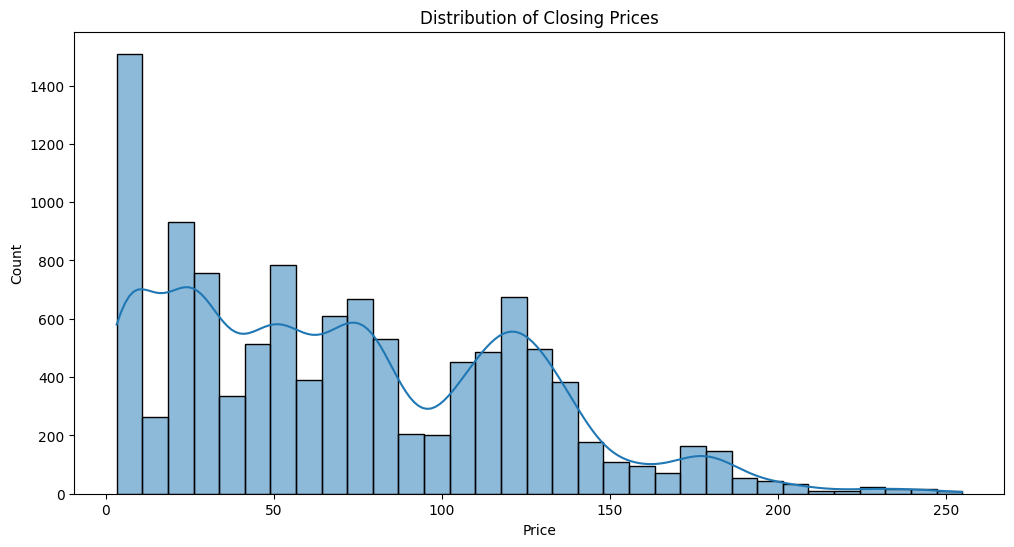

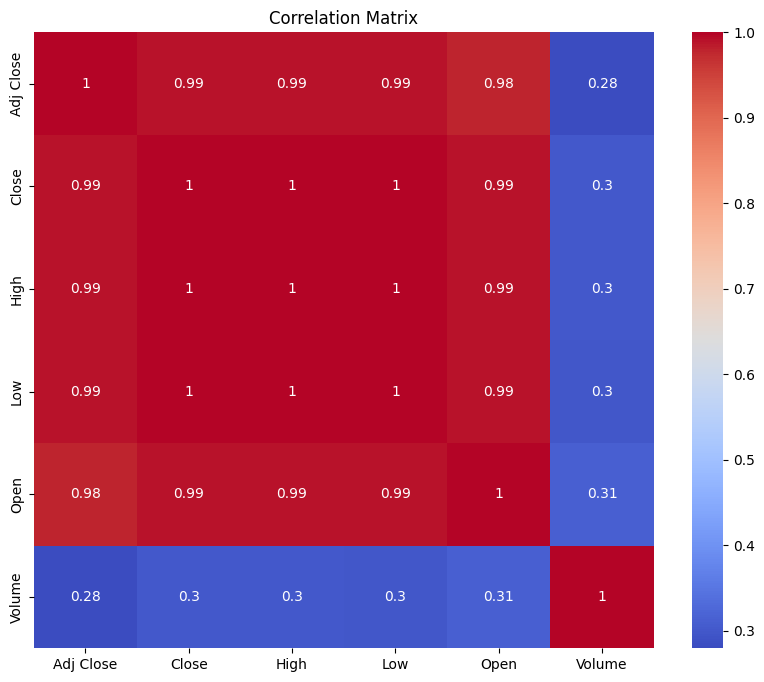

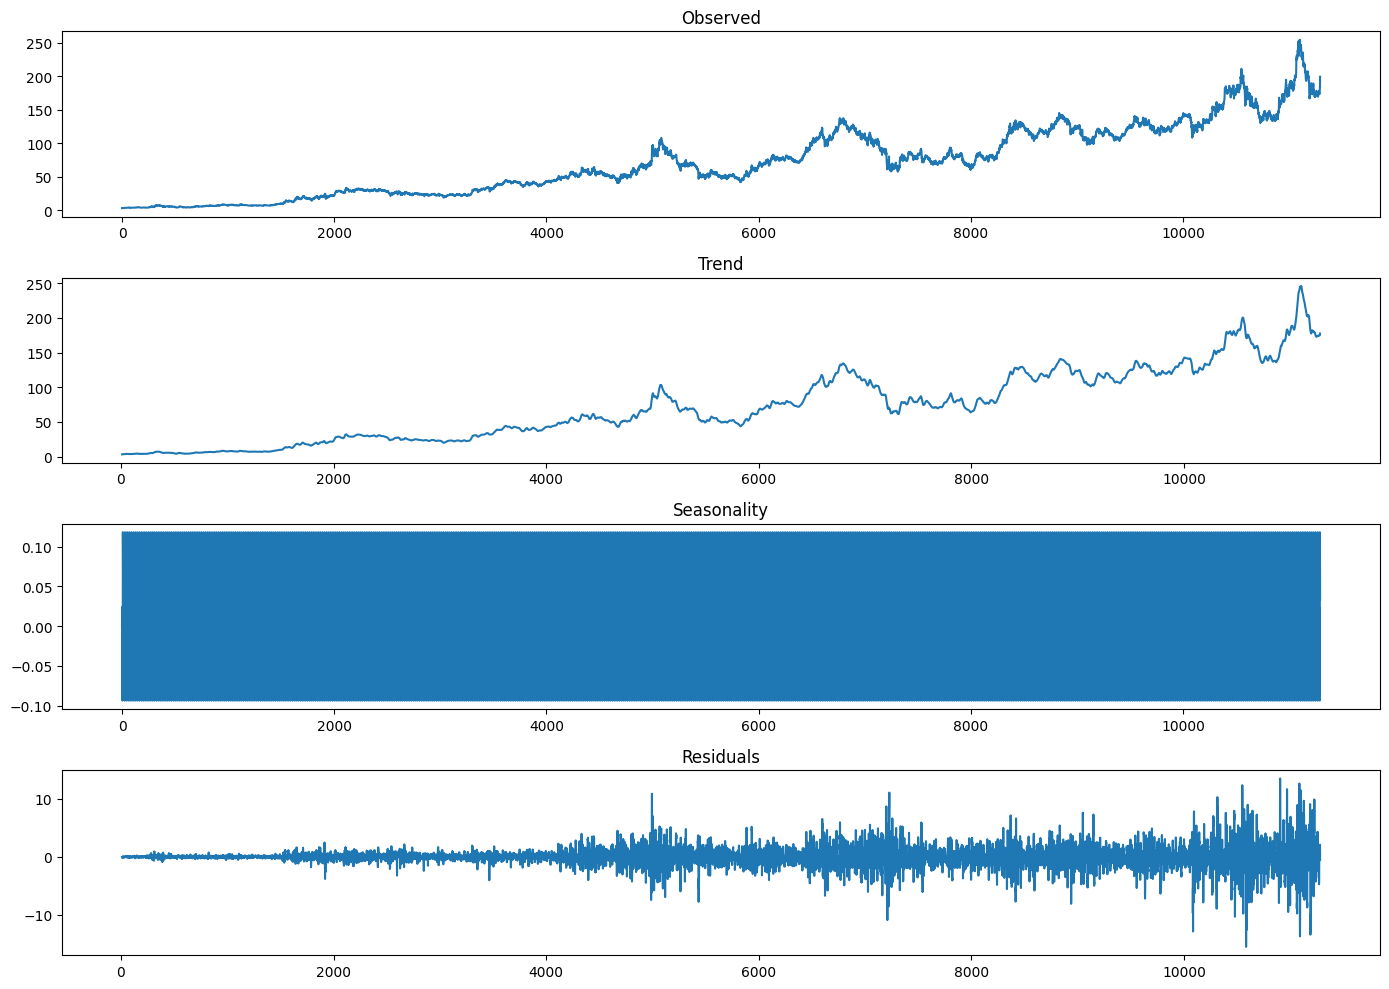

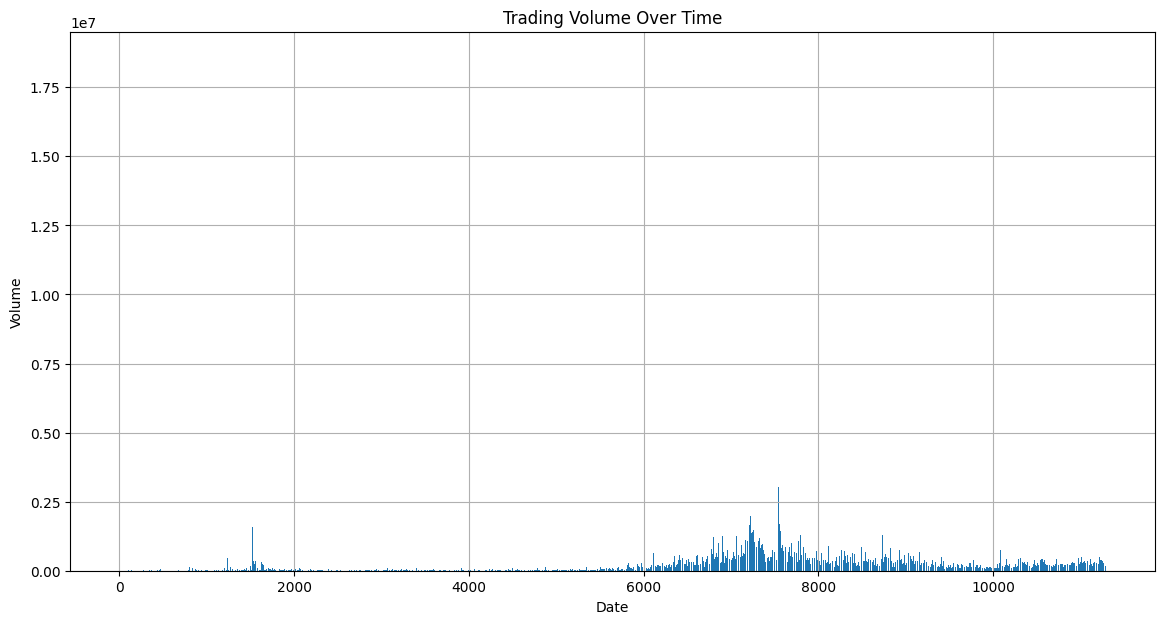

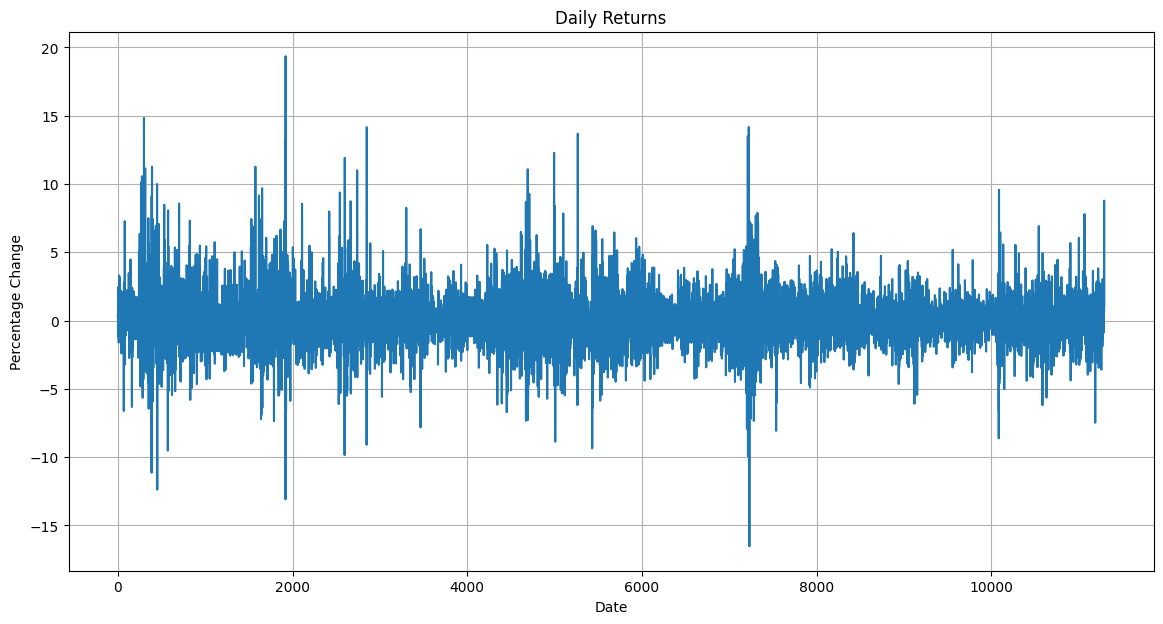

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Load the data
def load_data(data_text):
    # Convert text to dataframe
    lines = data_text.strip().split('\n')
    header = lines[0].split(',')
    data = []
    for line in lines[1:]:
        if line:  # Skip empty lines
            parts = line.split(',')
            # Handle missing index/date issues
            if not parts[0] or parts[0] == '':
                continue
            data.append(parts)

    df = pd.DataFrame(data, columns=header)

    # Clean up the dataframe
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

    # Convert numeric columns
    numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Missing values per column:\n{df.isna().sum()}")

# Descriptive statistics
print(df.describe())

# Visualize closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Distribution of closing prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.show()

# Correlation matrix of price columns
plt.figure(figsize=(10, 8))
correlation = df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Check for seasonality and trend
if len(df) > 30:  # Need sufficient data for decomposition
    df['Close'].fillna(method='ffill', inplace=True)
    decomposition = seasonal_decompose(df['Close'], model='additive', period=20)
    fig = plt.figure(figsize=(14, 10))

    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonality')

    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()

# Trading volume analysis
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Check for patterns in daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily_Return'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

            Unnamed: 0  Adj Close     Close      High       Low      Open  \
Date                                                                        
1980-04-17          22   2.427510  3.478533  3.478533  3.478533  3.478533   
1980-04-22          25   2.390163  3.425017  3.425017  3.425017  3.425017   
1980-05-02          33   2.558223  3.665839  3.665839  3.665839  3.665839   
1980-05-07          36   2.632913  3.772870  3.772870  3.772870  3.772870   
1980-06-11          60   2.828983  4.053829  4.053829  4.053829  4.053829   

            Volume  Daily_Return      MA_5  Volume_MA_5  ...  BB_Upper  \
Date                                                     ...             
1980-04-17     0.0           0.0  3.435720      24665.6  ...  3.503763   
1980-04-22     0.0           0.0  3.446423      13827.8  ...  3.520302   
1980-05-02     0.0           0.0  3.641757      16443.6  ...  3.729508   
1980-05-07     0.0           0.0  3.714003       4111.0  ...  3.802653   
1980-06-11     0

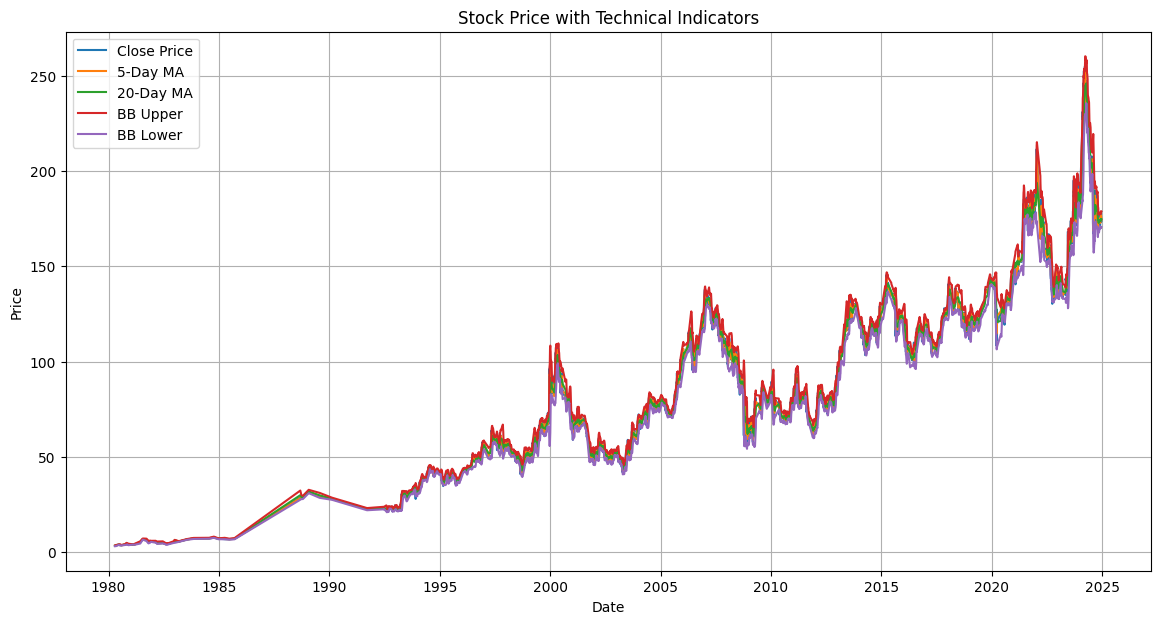

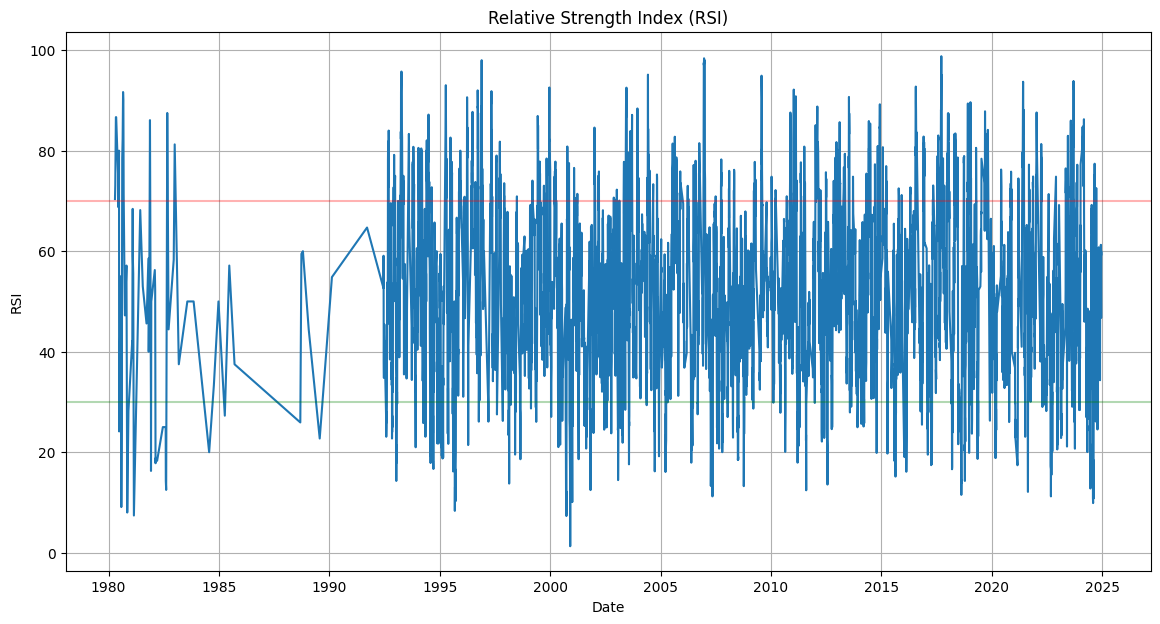

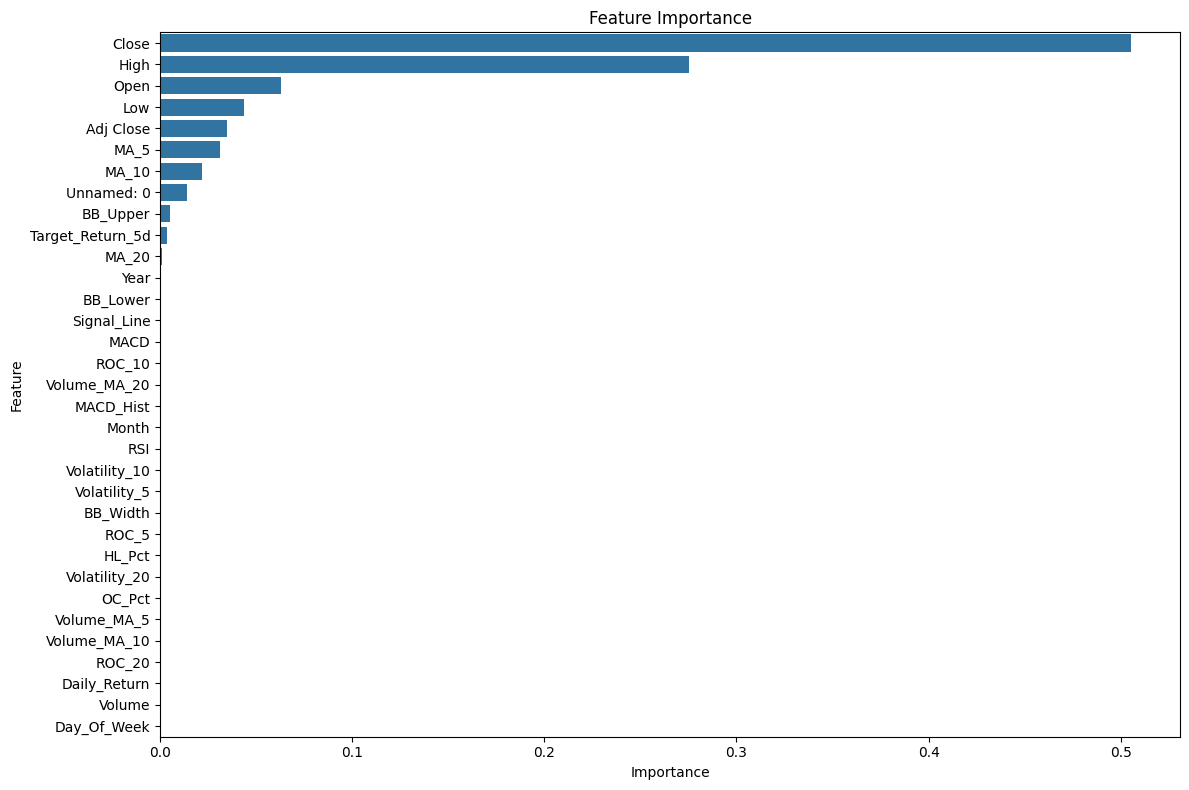

In [5]:
def create_features(df, window_sizes=[5, 10, 20], target_days=5):
    # Make a copy to avoid modifying the original
    data = df.copy()

    # Technical indicators
    # Moving averages
    for window in window_sizes:
        data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()
        data[f'Volume_MA_{window}'] = data['Volume'].rolling(window=window).mean()

    # Price momentum - rate of change
    for window in window_sizes:
        data[f'ROC_{window}'] = data['Close'].pct_change(periods=window) * 100

    # Volatility - rolling standard deviation
    for window in window_sizes:
        data[f'Volatility_{window}'] = data['Close'].rolling(window=window).std()

    # MACD (Moving Average Convergence Divergence)
    data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()
    data['Signal_Line'] = data['MACD'].ewm(span=9).mean()
    data['MACD_Hist'] = data['MACD'] - data['Signal_Line']

    # RSI (Relative Strength Index)
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()
    data['BB_Upper'] = rolling_mean + (rolling_std * 2)
    data['BB_Lower'] = rolling_mean - (rolling_std * 2)
    data['BB_Width'] = (data['BB_Upper'] - data['BB_Lower']) / rolling_mean

    # Daily returns
    data['Daily_Return'] = data['Close'].pct_change() * 100

    # High-Low difference as percentage
    data['HL_Pct'] = (data['High'] - data['Low']) / data['Low'] * 100

    # Open-Close difference as percentage
    data['OC_Pct'] = (data['Close'] - data['Open']) / data['Open'] * 100

    if 'Date' in data.columns and not isinstance(data.index, pd.DatetimeIndex):
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)
    # Day of week
    data['Day_Of_Week'] = data.index.dayofweek
    data['Year'] = data.index.year
    data['Month'] = data.index.month

    # Create target variable - future price after target_days
    data[f'Target_{target_days}d'] = data['Close'].shift(-target_days)
    data[f'Target_Return_{target_days}d'] = data['Close'].pct_change(periods=-target_days) * 100

    data = data.replace([np.inf, -np.inf], np.nan)
    # Dropping NA values that were generated during feature creation
    data = data.dropna()

    return data

# Apply feature engineering
feature_data = create_features(df)

# Show the first few rows with new features
print(feature_data.head())

# Visualize some of the engineered features
plt.figure(figsize=(14, 7))
plt.plot(feature_data.index, feature_data['Close'], label='Close Price')
plt.plot(feature_data.index, feature_data['MA_5'], label='5-Day MA')
plt.plot(feature_data.index, feature_data['MA_20'], label='20-Day MA')
plt.plot(feature_data.index, feature_data['BB_Upper'], label='BB Upper')
plt.plot(feature_data.index, feature_data['BB_Lower'], label='BB Lower')
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Visualize RSI
plt.figure(figsize=(14, 7))
plt.plot(feature_data.index, feature_data['RSI'])
plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

# Feature importance analysis
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = feature_data.drop(['Target_5d'], axis=1)
y = feature_data['Target_5d']

# Train a random forest to evaluate feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Linear Regression - RMSE: 3.3646, MAE: 2.3345
Random Forest - RMSE: 35.7057, MAE: 23.6322
Gradient Boosting - RMSE: 35.0977, MAE: 23.0787
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM - RMSE: 41.2001, MAE: 30.1055


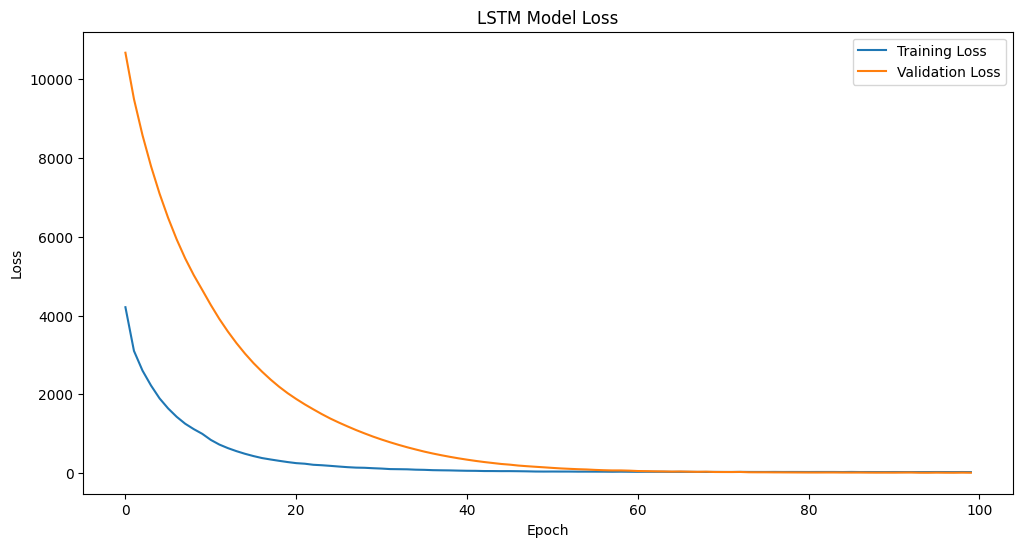

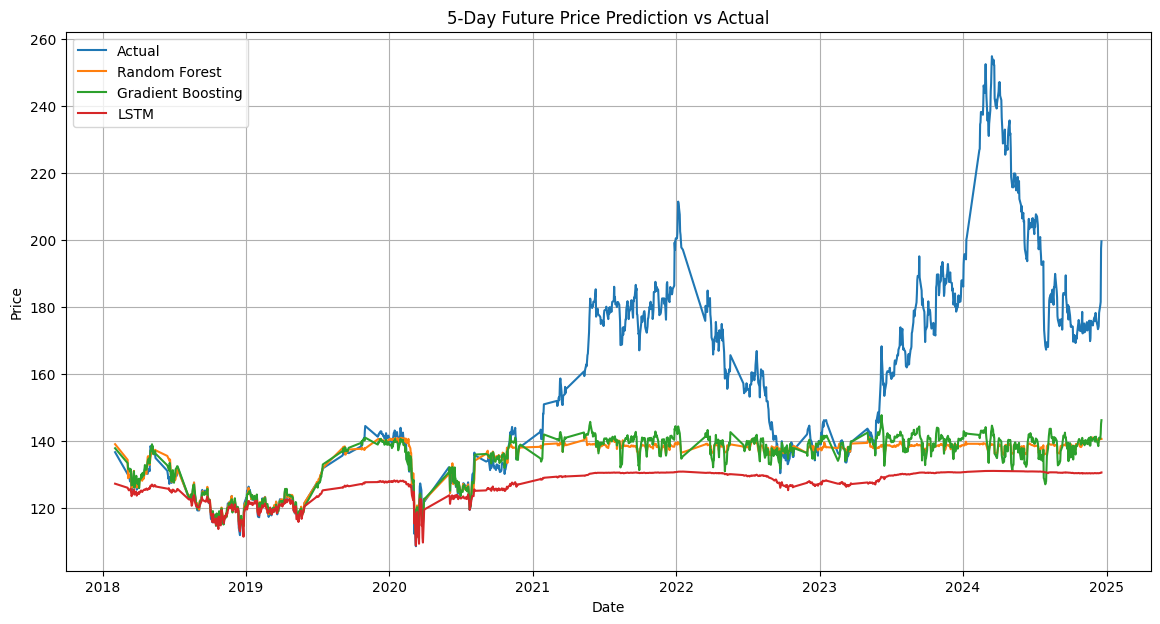

Directional Accuracy:
Linear Regression: 94.68%
Random Forest: 62.85%
Gradient Boosting: 64.06%
LSTM: 55.04%

Trading Simulation Results:
Initial Capital: $10,000
Final Capital: $40824.21
Return: 308.24%
Number of Trades: 76

Trade History:
         Date Action       Price      Shares       Capital
0  2018-03-06    BUY  131.339996   76.138269      0.000000
1  2018-03-15   SELL  130.389999    0.000000   9927.668880
2  2018-03-22    BUY  127.019997   78.158315      0.000000
3  2018-03-29   SELL  130.369995    0.000000  10189.499118
4  2018-04-06    BUY  125.370003   81.275416      0.000000
..        ...    ...         ...         ...           ...
71 2023-05-10   SELL  143.589996    0.000000  38160.155289
72 2023-05-25    BUY  139.600006  273.353536      0.000000
73 2023-06-02   SELL  146.000000    0.000000  39909.616252
74 2023-06-07    BUY  145.309998  274.651551      0.000000
75 2023-06-09   SELL  148.639999    0.000000  40824.206412

[76 rows x 5 columns]


In [6]:
# Prepare data for modeling
def prepare_model_data(feature_data, target_days=5):
    # Separate features and target
    X = feature_data.drop(['Target_5d'], axis=1)
    y = feature_data[f'Target_{target_days}d']

    # Train-test split (chronological)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # Normalize features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler

X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = prepare_model_data(feature_data)

# Model 1: Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
print(f"Linear Regression - RMSE: {lr_rmse:.4f}, MAE: {lr_mae:.4f}")

# Model 2: Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # RF doesn't necessarily need scaling
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest - RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}")

# Model 3: Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mae = mean_absolute_error(y_test, gb_pred)
print(f"Gradient Boosting - RMSE: {gb_rmse:.4f}, MAE: {gb_mae:.4f}")

# Model 4: LSTM (for time series)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

# Evaluate LSTM
lstm_pred = lstm_model.predict(X_test_lstm).flatten()
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
lstm_mae = mean_absolute_error(y_test, lstm_pred)
print(f"LSTM - RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_test.values, label='Linear Regression')
plt.plot(y_test.index, rf_pred, label='Random Forest')
plt.plot(y_test.index, gb_pred, label='Gradient Boosting')
plt.plot(y_test.index, lstm_pred, label='LSTM')
plt.title('5-Day Future Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Directional accuracy (up/down prediction accuracy)
def directional_accuracy(y_true, y_pred, current_price):
    # Determine actual direction
    actual_direction = (y_true.values > current_price.values).astype(int)
    # Determine predicted direction
    pred_direction = (y_pred > current_price.values).astype(int)
    # Calculate accuracy
    accuracy = (actual_direction == pred_direction).mean() * 100
    return accuracy

# Get the current prices corresponding to test dates
current_prices = feature_data.loc[y_test.index, 'Close']

# Calculate directional accuracy for each model
lr_dir_acc = directional_accuracy(y_test, lr_pred, current_prices)
rf_dir_acc = directional_accuracy(y_test, rf_pred, current_prices)
gb_dir_acc = directional_accuracy(y_test, gb_pred, current_prices)
lstm_dir_acc = directional_accuracy(y_test, lstm_pred, current_prices)

print(f"Directional Accuracy:")
print(f"Linear Regression: {lr_dir_acc:.2f}%")
print(f"Random Forest: {rf_dir_acc:.2f}%")
print(f"Gradient Boosting: {gb_dir_acc:.2f}%")
print(f"LSTM: {lstm_dir_acc:.2f}%")

# Simulate trading performance
def simulate_trading(y_true, y_pred, current_price, initial_capital=10000):
    # Starting with initial capital
    capital = initial_capital
    shares = 0
    trades = []

    for i in range(len(y_true)):
        date = y_true.index[i]
        current = current_price.iloc[i]
        pred = y_pred[i]

        # Buy signal: predicted price is higher than current
        if pred > current * 1.01 and shares == 0:  # 1% threshold to avoid noise
            shares = capital / current
            capital = 0
            trades.append((date, 'BUY', current, shares, capital))

        # Sell signal: predicted price is lower than current
        elif pred < current * 0.99 and shares > 0:  # 1% threshold to avoid noise
            capital = shares * current
            shares = 0
            trades.append((date, 'SELL', current, shares, capital))

    # Final evaluation (sell any remaining shares)
    if shares > 0:
        capital = shares * y_true.iloc[-1]
        trades.append((y_true.index[-1], 'FINAL SELL', y_true.iloc[-1], 0, capital))

    return_pct = (capital - initial_capital) / initial_capital * 100

    return trades, capital, return_pct

# Run trading simulation for the best model (based on RMSE and directional accuracy)
best_model_pred = gb_pred  # Assuming Gradient Boosting performed best
trades, final_capital, return_pct = simulate_trading(y_test, best_model_pred, current_prices)

print(f"\nTrading Simulation Results:")
print(f"Initial Capital: $10,000")
print(f"Final Capital: ${final_capital:.2f}")
print(f"Return: {return_pct:.2f}%")
print(f"Number of Trades: {len(trades)}")

# Show trade details
if trades:
    trades_df = pd.DataFrame(trades, columns=['Date', 'Action', 'Price', 'Shares', 'Capital'])
    print("\nTrade History:")
    print(trades_df)

In [ ]:
# Hyperparameter tuning for the best model (Gradient Boosting)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Retrain with best parameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)

# Final predictions
final_pred = best_gb_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
final_dir_acc = directional_accuracy(y_test, final_pred, current_prices)

print(f"Final Model - RMSE: {final_rmse:.4f}")
print(f"Final Model - Directional Accuracy: {final_dir_acc:.2f}%")

# Generate predictions for the test period
# Assuming the last 5 days of data are for testing future predictions
last_data = feature_data.iloc[-1:].drop(['Target_5d', 'Target_Return_5d'], axis=1)
X_future = last_data
future_pred = best_gb_model.predict(X_future)[0]

print(f"\nPrediction for 5 days after the last date ({feature_data.index[-1]}):")
print(f"Predicted Close Price: ${future_pred:.4f}")
print(f"Current Close Price: ${feature_data['Close'].iloc[-1]:.4f}")
print(f"Predicted Change: {((future_pred / feature_data['Close'].iloc[-1]) - 1) * 100:.2f}%")

# Generate CSV file with predictions for the test period
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual_Close': y_test.values,
    'Predicted_Close': final_pred,
    'Current_Close': current_prices.values,
    'Predicted_Change_Pct': ((final_pred / current_prices.values) - 1) * 100
})

# Save predictions to CSV
predictions_df.to_csv('stock_price_predictions.csv', index=False)
print("Predictions saved to 'stock_price_predictions.csv'")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
